In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Visualisation des données

### 2.1. Distribution des étiquettes

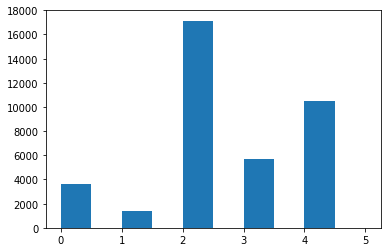

In [10]:
%run data_importation.py
plt.hist(y, range = (0, 5))
plt.show()

### 2.2. Visualisation des signaux

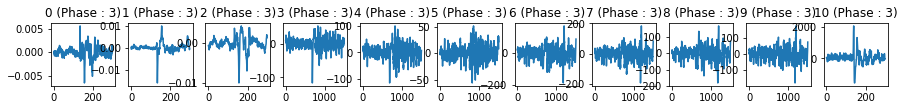

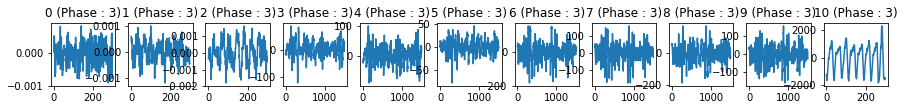

In [4]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        plt.subplot(11,11,k_id+1)
        plt.plot(X_train[k][i])
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 2. Analyse fréquentielle

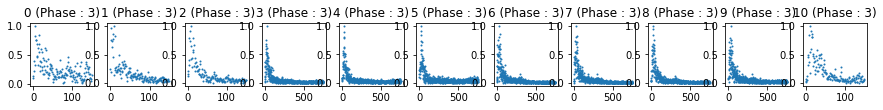

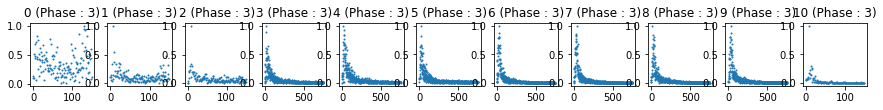

In [6]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        signal=X_train[k][i]
        
        Ne = len(signal)
        spectre = np.absolute(np.fft.fft(signal))
        spectre = spectre[0:len(spectre)//2]
        spectre = [s/max(spectre) for s in spectre]
        
        plt.subplot(11,11,k_id+1)
        plt.plot(spectre, marker="o", markersize=1, linestyle="none")
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

### Observations :

L'amplitude des fréquences varie en fonction de la phase... à compléter

## 3. Entrainement par cross-validation

### 3.1 Matrice de design

#### Construction de la matrice

In [12]:
import feature_extraction

X_train_fft = h5py.File('X_train_fft.h5','r')
X_test_fft = h5py.File('X_test_fft.h5','r')

X_train_preprocessed = feature_extraction.extractMultiFeatureAll(X_train_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="trainX")
X_test_preprocessed = feature_extraction.extractMultiFeatureAll(X_test_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="testX")

#### Chargement de la matrice

In [1]:
import pickle

temp_var_file = open("trainX" + '.txt','rb')
X_train_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

temp_var_file = open("testX" + '.txt','rb')
X_test_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

### 3.2 Apprentissage

In [2]:
import cross_validation_learning

#### Méthode k-nn

In [3]:
from sklearn import neighbors

mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, neighbors.KNeighborsClassifier, [[i for i in range(1,5,2)]], 10)

KeyboardInterrupt: 

#### Méthode de régression logistique

In [4]:
from sklearn import linear_model
#mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [[]], 10)
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [['l2'], [False], [0.0001,0.0002,0.0003], [1,1000]], 10)

3
[[[[['l2' 'False' '0.0001' '1']
    ['l2' 'False' '0.0001' '1000']]

   [['l2' 'False' '0.0002' '1']
    ['l2' 'False' '0.0002' '1000']]

   [['l2' 'False' '0.0003' '1']
    ['l2' 'False' '0.0003' '1000']]]]] [[[[[2. 2. 2. ... 2. 2. 2.]
    [2. 2. 2. ... 2. 2. 2.]]

   [[2. 2. 2. ... 2. 2. 2.]
    [2. 2. 2. ... 2. 2. 2.]]

   [[2. 2. 2. ... 2. 2. 2.]
    [2. 2. 2. ... 2. 2. 2.]]]]] [[[[[0.02908165 0.02929246 0.0290034  ... 0.02909325 0.02905354
     0.02905354]
    [0.02916067 0.02916067 0.0289289  ... 0.02916067 0.0289404
     0.02901922]]

   [[0.02907572 0.0289741  0.02922099 ... 0.02902572 0.0289741
     0.02929768]
    [0.02886404 0.02886404 0.02884117 ... 0.02941483 0.02908303
     0.02886404]]

   [[0.02904802 0.02916642 0.02914151 ... 0.02911118 0.02914151
     0.02888058]
    [0.02899896 0.02892331 0.02891215 ... 0.02906315 0.02899896
     0.02881132]]]]] LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100

#### Méthode de l'arbre de décision

In [4]:
from sklearn import tree

mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, tree.DecisionTreeClassifier, [[]], 10)

ValueError: not enough values to unpack (expected 4, got 3)

### 3.3 Visualisation des résultats

#### Méthode k-nn

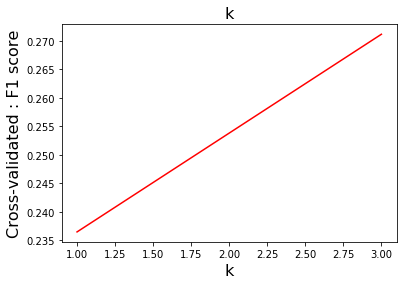

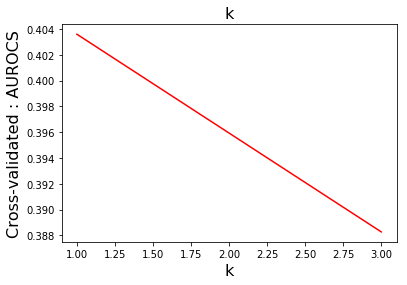

In [7]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "k", [])

#### Méthode de régression logistique

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


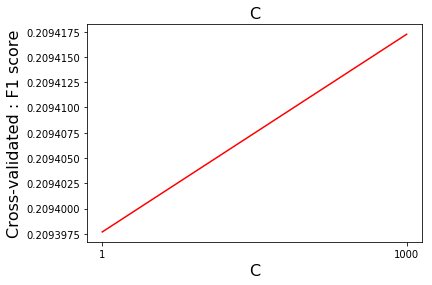

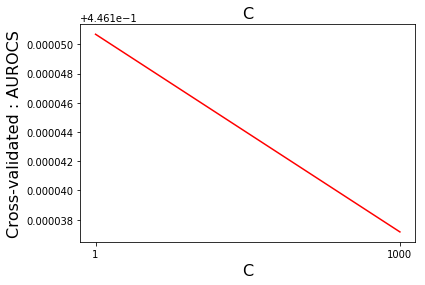

In [6]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 3, "C", [0, 0, 0])
#cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

#### Méthode de l'arbre de décision

In [4]:
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

F1-score : 0.211286903093858
AUROC : 0.42399016512611815


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1317	292	466	135	408
Predicted 1	21	0	7	0	2
Predicted 2	2241	1058	16633	5587	10030
Predicted 3	0	0	0	0	0
Predicted 4	40	3	26	9	14


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 4. Prédiction sur le dataset de test

In [9]:
cross_validation_learning.predict(X_test_preprocessed, clf, save=True, name_save = "First")

array([2, 0, 2, ..., 2, 2, 2])